In [14]:
# Common imports
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
try:
    from sklearn.impute import SimpleImputer # Scikit-Learn 0.20+
except ImportError:
    from sklearn.preprocessing import Imputer as SimpleImputer
    
    
try:
    from sklearn.compose import ColumnTransformer
except ImportError:
    from future_encoders import ColumnTransformer # Scikit-Learn < 0.20

In [2]:
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [3]:
Data = pd.read_csv('dataset-exo2/train-data.txt', sep=" ")
data = Data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Columns: 1301 entries, species to feature_1300
dtypes: float64(1061), int64(239), object(1)
memory usage: 4.1+ MB


In [5]:
display_side_by_side(data.iloc[:,100:106].head(), data.iloc[:,0:6].describe().head())

feature_100 
 feature_101 
 feature_102 
 feature_103 
 feature_104 
 feature_105 
 
 
 
 
 0 
 0.0 
 0.0 
 0 
 0.0 
 0 
 0.0 
 
 
 1 
 0.0 
 0.0 
 0 
 0.0 
 0 
 0.0 
 
 
 2 
 0.0 
 0.0 
 0 
 0.0 
 0 
 0.0 
 
 
 3 
 0.0 
 0.0 
 0 
 0.0 
 0 
 0.0 
 
 
 4 
 0.0 
 0.0 
 0 
 0.0 
 0 
 0.0 
 
 
 
 
 
 
 feature_1 
 feature_2 
 feature_3 
 feature_4 
 feature_5 
 
 
 
 
 count 
 417.0 
 417.0 
 417.000000 
 417.000000 
 417.000000 
 
 
 mean 
 0.0 
 0.0 
 0.766465 
 0.030252 
 0.055657 
 
 
 std 
 0.0 
 0.0 
 1.830476 
 0.358511 
 0.566663 
 
 
 min 
 0.0 
 0.0 
 0.000000 
 0.000000 
 0.000000 
 
 
 25% 
 0.0 
 0.0 
 0.000000 
 0.000000 
 0.000000

load dataset of size 417 x 1301 involving 20 classes
number of observation per categories :
[17 20 53 19 12 17 17  8 20 20 17 13 10 23 11 42 23 43 20 12]


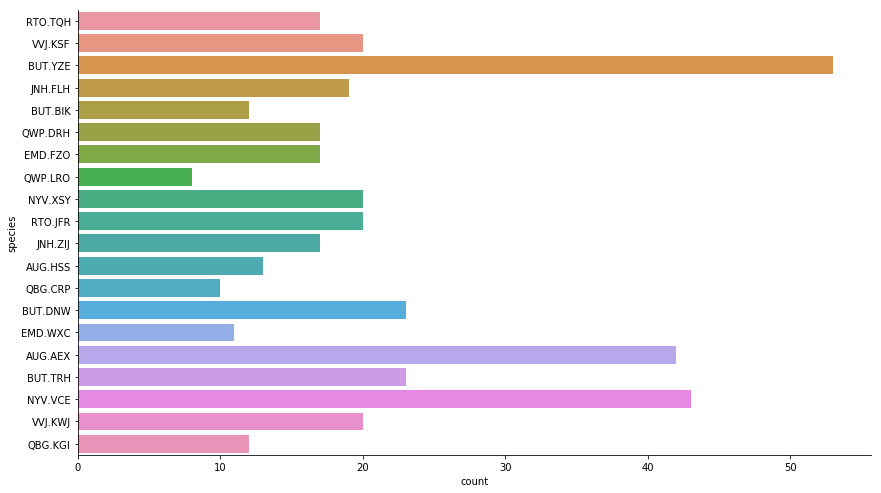

In [6]:
n = data.shape[0]
p = data.shape[1]
K = len(np.unique(data.species))
print('load dataset of size %d x %d involving %d classes' % (n,p,K))
print('number of observation per categories :')
print(np.bincount(pd.factorize(data['species'])[0]))
g = sns.catplot(y="species", kind="count",  data=data);
g.fig.set_size_inches(15,7)

In [8]:
sample_incomplete_rows = data[data.isnull().any(axis=1)].head()
sample_incomplete_rows

,species,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_1291,feature_1292,feature_1293,feature_1294,feature_1295,feature_1296,feature_1297,feature_1298,feature_1299,feature_1300
6,VVJ.KSF,0,0,5.125,0.0,0.0,0,4.991,0.0,0.0,...,0.0,0.0,0,0.000,0.0,0.0,0,0.0,0.0,0.000
7,VVJ.KSF,0,0,0.000,0.0,0.0,0,0.000,0.0,0.0,...,0.0,0.0,0,3.813,0.0,0.0,0,0.0,0.0,3.889
11,BUT.YZE,0,0,0.000,0.0,0.0,0,0.000,0.0,0.0,...,0.0,0.0,0,0.000,0.0,0.0,0,0.0,0.0,0.000
15,BUT.BIK,0,0,0.000,0.0,0.0,0,0.000,0.0,0.0,...,0.0,0.0,0,0.000,0.0,0.0,0,0.0,0.0,0.000
18,BUT.BIK,0,0,0.000,0.0,0.0,0,0.000,4.5,0.0,...,0.0,0.0,0,0.000,0.0,0.0,0,0.0,0.0,0.000


In [9]:
print(" Il y ", data.isnull().any(axis=1).sum(), "valeurs maquantes, que nous allons imputer")

 Il y  193 valeurs maquantes, que nous allons imputer


In [10]:
target = pd.factorize(data['species'])
data.species = target[0]

X_train = data.drop('species', axis = 1).values
y_train = data.species.copy().values

test = pd.read_csv('E:/DNN_Work_flow/very_dnn_with_all_para_technique/dataset-exo2/test-data.txt', sep=" ")

imputer = SimpleImputer(strategy="median")
X = imputer.fit_transform(X_train)

# Exploration des données : 

Comme nous sommes en grande dimention avec ce jeu de données, cela rend non seulement l'entrainementd'un modéle extrêmement lente, mais peut également rendre beaucoup plus difficile la recherche d'une bonne solution. Nous allons essayer quelques techniques de réduction de la dimensionnalité : transformation du jeu de données pour réduire le nombre de variable. Ceci est utile pour l'analyse et la visualisation des données, ou comme étape de prétraitement avant une tâche d'apprentissage supervisée.
### PCA
Au lieu pour choisir arbitrairement le nombre de dimensions à réduire, nous choisir le nombre de dimensions qui s’ajoutent à une partie suffisamment importante de la variance : 95% 

In [11]:
pca = PCA(n_components=0.95)
pca.fit(X)
Xpca = pca.transform(X) 
print("En appliquant l'ACP et en conservant 95% de la variabilitée des donnée, nous avons réduit la dimmension du jeu de donnée initiale. L'ACP ", len(pca.components_), 'dimentions')

En appliquant l'ACP et en conservant 95% de la variabilitée des donnée, nous avons réduit la dimmension du jeu de donnée initiale. L'ACP  259 dimentions


Le résultat obteniue avec l'ACP est trés bien mais, la réduction de la dimensionnalité entraîne la perte de certaines informations, de sorte que même si cela accélère la formation, le système risque d’être légèrement moins performant. Donc nous essayerons de former deux pipelines avec et sans la réduction de la dimensionnalité et observer le comportement de notre modéle.
Nous allons visualiser les 4 premiers composantes et la courbe quantifiant la part de la variance totale à 259 dimensions contenue dans les premières composantes principales.

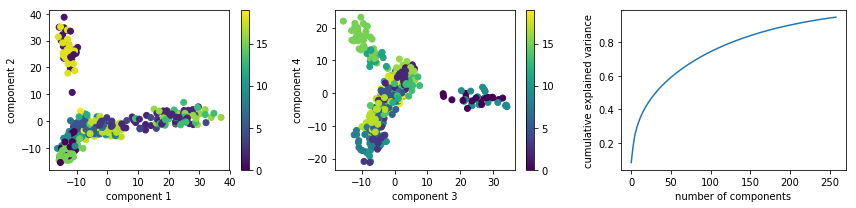

In [12]:
plt.figure(figsize=(12,3))

plt.subplot(1, 3, 1)
plt.scatter(Xpca[:,0],Xpca[:,1], c = target[0])
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()


plt.subplot(1, 3, 2)
plt.scatter(Xpca[:,2],Xpca[:,3], c = target[0])
plt.xlabel('component 3')
plt.ylabel('component 4')
plt.colorbar()

plt.subplot(1, 3, 3)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

plt.tight_layout()
plt.show()

De nombreuses étapes de transformation des données doivent être exécutées dans le bon ordre avant d'entrainer nos modéle. Heureusement, Scikit-Learn nous propose à la classe **Pipeline** pour automatiser de telles séquences de transformations. Comme nous l'avons dit plus haut nous allons former deux Pipelines avec et sans reduction de la dimensionnalité car cette derniére entraine une perte de certaines informations.

In [15]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer()),
        ('std_scaler', StandardScaler()),
    ])

num_attribs = list(Data.select_dtypes(include=[np.number]))

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs)
    ])


# prepare_select_and_predict_pipeline = Pipeline([
#     ('preparation', full_pipeline),
#     ('knn', KNeighborsClassifier())
# ])

# k_list = np.arange(1,16,2)
# param_grid = [{
#     'preparation__num__imputer__strategy': ['mean', 'median', 'most_frequent'],
#     'knn__weights': ["uniform", "distance"],
#     'knn__n_neighbors': k_list
    
# }]

In [ ]:
grid_search_prep = GridSearchCV(prepare_select_and_predict_pipeline, param_grid, cv=5, verbose=2, n_jobs=4)

In [16]:
X = num_pipeline(data)

TypeError: 'Pipeline' object is not callable

In [ ]:
k_range = np.arange(1,31)
weights = ["uniform","distance"]
param_grid = dict(n_neighbors = k_range, weights = weights)
knn = KNeighborsClassifier()
randomized = RandomizedSearchCV(knn, param_grid,scoring = "accuracy", cv = 5, n_iter = 10, random_state=42)
randomized.fit(X, y_train)

In [ ]:
(grid_search.best_params_ ,randomized.best_params_)

In [ ]:
(grid_search.best_score_, randomized.best_score_)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
k_list = np.arange(1,16,2)

param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': k_list}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=10, verbose=3, n_jobs=-1)
grid_search.fit(X, y_train)

# Pour le pipeline ! 
La réduction de la dimensionnalité entraîne la perte de certaines informations (tout comme la compression d’une image au format JPEG peut dégrader sa qualité), de sorte que même si cela accélère la formation, le système risque d’être légèrement moins performant. Cela rend également vos pipelines un peu plus complexes et donc plus difficiles à maintenir. Vous devez donc commencer par essayer de former votre système avec les données d'origine avant d'envisager d'utiliser la réduction de dimensionnalité si la formation est trop lente. Dans certains cas, cependant, la réduction de la dimensionnalité des données d’entraînement peut filtrer certains bruits et certains détails inutiles et ainsi entraîner de meilleures performances (mais en général cela ne le fera pas; cela ne fera qu’accélérer la formation).

### PCA
Au lieu pour choisir arbitrairement le nombre de dimensions à réduire, nous choisir le nombre de dimensions qui s’ajoutent à une partie suffisamment importante de la variance : 95% 

In [ ]:
(data.dtypes == 'int').su

In [ ]:
from pandas.api.types import is_numeric_dtype
is_numeric_dtype(X_train)

In [ ]:
X = Data.select_dtypes(include=[np.number])

In [ ]:
X.shape

In [ ]:
num_attribs = list(X)